In [1]:
import acquire
import prepare
import wrangle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing

In [2]:
df = wrangle.prep_telco_df()

No duplicates found.
Dummy variables for gender created as "male".
Yes/No column values changed to boolean, 0 as no and 1 as yes
Combined variable for phone_service + multiple lines created.
Combined variable for partner + dependents created.
Simplified features: security, backup, protection, support, and payment type.
Column for service type added.
Added feature for tenure in years.
Converted total_charges to float for easier manipulation.
Data prep complete.




In [3]:
train, test, validate = wrangle.train_test_validate(df)

train shape:  (5070, 22) , validate shape:  (1268, 22) , test shape:  (705, 22)

train percent:  72.0 , validate percent:  18.0 , test percent:  10.0


In [4]:
train.head(1).T

,855
customer_id,6923-EFPNL
senior_citizen,0
tenure_months,4
phone_service,2
internet_service_type_id,1
online_security,0
online_backup,0
device_protection,0
tech_support,0
streaming_tv,0


# Use the telco dataset. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way you find helpful.

# Scaling Total Charges

(array([1987.,  854.,  478.,  357.,  326.,  300.,  287.,  230.,  165.,
          86.]),
 array([   0.  ,  868.48, 1736.96, 2605.44, 3473.92, 4342.4 , 5210.88,
        6079.36, 6947.84, 7816.32, 8684.8 ]),
 <a list of 10 Patch objects>)

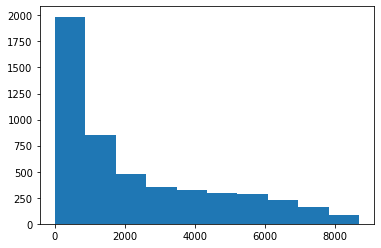

In [5]:
plt.hist(train.total_charges)

In [6]:
# 1. create the object - using mon max scalar
scaler1 = sklearn.preprocessing.MinMaxScaler()

# 2. fit the object
scaler1.fit(train[['total_charges']])

# 3. use the object
train['total_charges_scaled'] = scaler1.transform(train[['total_charges']])
test['total_charges_scaled'] = scaler1.transform(test[['total_charges']])
validate['total_charges_scaled'] = scaler1.transform(validate[['total_charges']])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


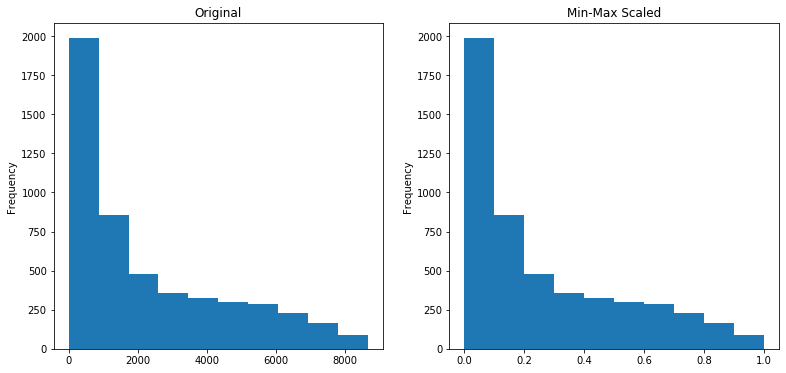

In [7]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.total_charges.plot.hist(title='Original')
plt.subplot(122)
train.total_charges_scaled.plot.hist(title='Min-Max Scaled')

# Scaling Monthly Charges

(array([1136.,  139.,  268.,  462.,  329.,  662.,  709.,  608.,  543.,
         214.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <a list of 10 Patch objects>)

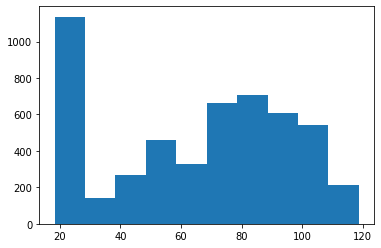

In [8]:
plt.hist(train.monthly_charges)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Standard Scaled')

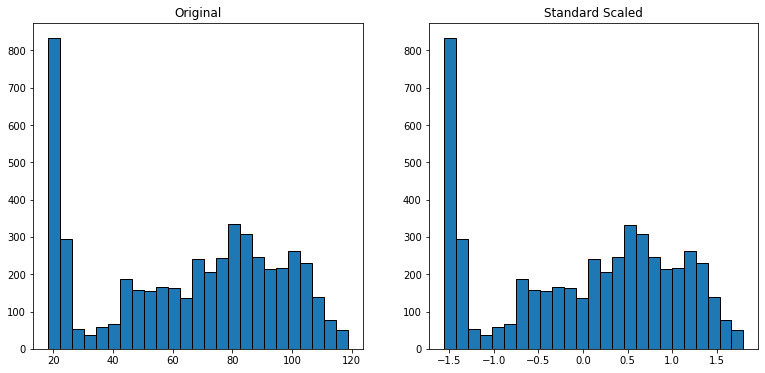

In [9]:
# 1. Create the object - using standard scalar
scaler2 = sklearn.preprocessing.StandardScaler()

# 2. Fit to the train data only
scaler2.fit(train[['monthly_charges']])

# 3. use the object
train['monthly_charges_scaled'] = scaler2.transform(train[['monthly_charges']])
test['monthly_charges_scaled'] = scaler2.transform(test[['monthly_charges']])
validate['monthly_charges_scaled'] = scaler2.transform(validate[['monthly_charges']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train.monthly_charges_scaled, bins=25, ec='black')
plt.title('Standard Scaled')

# Scaling Tenure Months

(array([1211.,  549.,  400.,  378.,  341.,  351.,  324.,  349.,  360.,
         807.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <a list of 10 Patch objects>)

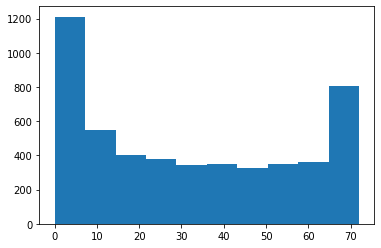

In [10]:
plt.hist(train.tenure_months)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Robust Scaled')

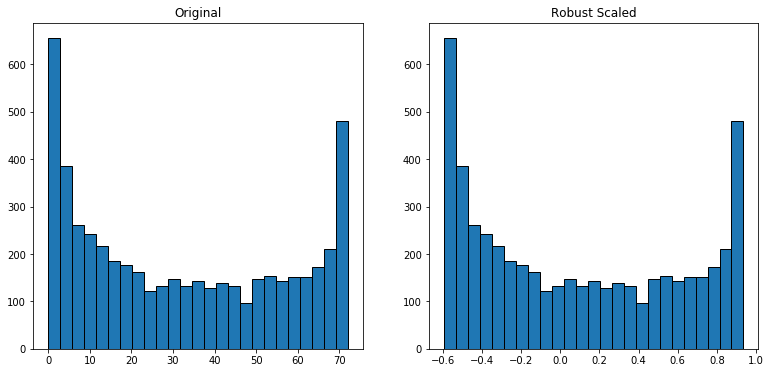

In [11]:
# 1. Create the object
scaler3 = sklearn.preprocessing.RobustScaler()

# 2. Fit to train data only
scaler3.fit(train[['tenure_months']])

# 3. use the object
train['tenure_months_scaled'] = scaler3.transform(train[['tenure_months']])
test['tenure_months_scaled'] = scaler3.transform(test[['tenure_months']])
validate['tenure_months_scaled'] = scaler3.transform(validate[['tenure_months']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.tenure_months, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train.tenure_months_scaled, bins=25, ec='black')
plt.title('Robust Scaled')

In [12]:
# take a look at the scales columns added to the end
train.head()

,customer_id,senior_citizen,tenure_months,phone_service,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,...,total_charges,churn,contract_type,Male,part_depd,service_type,tenure_years,total_charges_scaled,monthly_charges_scaled,tenure_months_scaled
855,6923-EFPNL,0,4,2,1,0,0,0,0,0,...,201.10,1,0,1,0,3,0.33,0.023155,-0.439334,-0.510638
2823,2004-OCQXK,0,1,1,2,0,0,0,0,0,...,81.95,1,0,0,0,3,0.08,0.009436,0.568928,-0.574468
5656,2542-HYGIQ,0,1,1,0,0,0,0,0,0,...,19.95,0,0,0,0,1,0.08,0.002297,-1.501015,-0.574468
1016,8205-MQUGY,0,12,1,1,1,0,0,0,0,...,571.15,0,0,1,2,3,1.00,0.065764,-0.524469,-0.340426
1175,9555-SAHUZ,0,38,1,1,1,1,0,0,0,...,2076.05,0,0,0,2,3,3.17,0.239044,-0.347522,0.212766


2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [18]:
data_scales = train[['total_charges','total_charges_scaled']]
data_scales['inverse_transform1'] = scaler1.inverse_transform(train[['total_charges_scaled']])

data_scales['monthly_charges'] = train['monthly_charges']
data_scales['monthly_charges_scaled'] = train['monthly_charges_scaled']
data_scales['inverse_transform2'] = scaler2.inverse_transform(train[['monthly_charges_scaled']])

data_scales['tenure_months'] = train['tenure_months']
data_scales['tenure_months_scaled'] = train['tenure_months_scaled']
data_scales['inverse_transform3'] = scaler3.inverse_transform(train[['tenure_months_scaled']])

data_scales.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,total_charges,total_charges_scaled,inverse_transform1,monthly_charges,monthly_charges_scaled,inverse_transform2,tenure_months,tenure_months_scaled,inverse_transform3
855,201.10,0.023155,201.10,51.75,-0.439334,51.75,4,-0.510638,4.0
2823,81.95,0.009436,81.95,81.95,0.568928,81.95,1,-0.574468,1.0
5656,19.95,0.002297,19.95,19.95,-1.501015,19.95,1,-0.574468,1.0
1016,571.15,0.065764,571.15,49.20,-0.524469,49.20,12,-0.340426,12.0
1175,2076.05,0.239044,2076.05,54.50,-0.347522,54.50,38,0.212766,38.0


### Scaled data that is inverse transformed matches the original data
- months changed to decimal

3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!